In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [40]:
data=pd.read_csv("bengaluru_house_prices.csv")

In [41]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [42]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [43]:
data=data.drop(['area_type','availability','society'], axis=1)

# Handling NA

In [44]:
data.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [45]:
data.count()

location      13319
size          13304
total_sqft    13320
bath          13247
balcony       12711
price         13320
dtype: int64

In [46]:
data['balcony']=data['balcony'].fillna(0)

In [47]:
data=data.dropna()

# Data cleaning

In [48]:
data.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [49]:
data['bed']=data['size'].apply(lambda x: int(x.split(" ")[0]))

In [50]:
data.head(2)

,location,size,total_sqft,bath,balcony,price,bed
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4


In [51]:
data.bed.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [58]:
df=data[data['bed']>20]
df

,location,size,total_sqft,bath,balcony,price,bed
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [61]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

We can see there are unique values like 1133-1384, which creates data nonuniformity, so average of these values should be taken.

In [62]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [72]:
data[~(data['total_sqft'].apply(is_float))].head()

,location,size,total_sqft,bath,balcony,price,bed
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2


In [78]:
def convert_to_num(x):
    token=x.split('-')
    if (len(token)==2):
        return (float(token[0])+float(token[1]))/2
    
    try:
        return float(x)
    except:
        return None
   

In [80]:
data1=data.copy()
data1['total_sqft']=data1['total_sqft'].apply(convert_to_num)
data1.head()

,location,size,total_sqft,bath,balcony,price,bed
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [94]:
data1['total_sqft'][30]

2475.0

above is the average total sqft for value 2100 - 2850, as (2100 - 2850)/2 is equals to 2475

In [93]:
data['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

Adding new feature called price_per_sqft

In [101]:
data1['price_per_sqft']= ((data1['price']*100000)/data1['total_sqft'])

In [138]:
data1.head()

,location,size,total_sqft,bath,balcony,price,bed,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [133]:
data1["price_per_sqft"].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Now, lets examine the location feature which is a categorical feature, so we need to apply dimension reduction technique here to reduce the no.s of locations.

In [108]:
data2=data1.copy()
data2['location']=data2['location'].apply(lambda x:x.strip())
loc=data2['location'].value_counts(ascending=False)

In [109]:
loc

Whitefield                535
Sarjapur  Road            392
Electronic City           304
Kanakpura Road            266
Thanisandra               236
                         ... 
Goraguntepalya              1
Adugodi                     1
Yelahanka,MVIT college      1
Neelasandra                 1
Subbannaiah Palya           1
Name: location, Length: 1293, dtype: int64

In [114]:
loc.sum()

13246

In [119]:
len(loc[loc<=10])

1052

In [120]:
len(loc[loc>10])

241

In [121]:
len(loc)

1293

Now, we create a location named others and put the locations whose count is less than 10 to that location. this way, when we use one hot encoding to the feature, the dimensions will be reduced in a huge amount.

In [123]:
data3=data2.copy()

In [ ]:
data3['location']=data3['location'].apply(lambda x:'others' if x in loc[loc<=10] else x)
len(data3.location.unique())

In [128]:
data3=data3.drop('pps',axis=1)

Now, lets remove Outliers from our dataset. we are keeping minimum sqft area of bedroom is 300 and we are assuming any values below 300 sqft is an outliers.

In [129]:
data3[(data3['total_sqft']/data3['bed'])<300].head()

,location,size,total_sqft,bath,balcony,price,bed,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,0.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,0.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000


Here, we can see a row having 6 bedrooms with total sqft of 1020, and another with 8 bedrooms in 600 sqft which clearly are dta errors so we have to remove these.

In [139]:
data4=data3[~((data3['total_sqft']/data3['bed'])<300)]
data4.shape

(12502, 8)

# Outlier removal using Standard Deviation and Mean

In [141]:
data4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here, we find the minimum price per sqft is 267 where max is 176470 as there seems to be a vast gap difference, we remove outliers per location using mean and standard deviation.

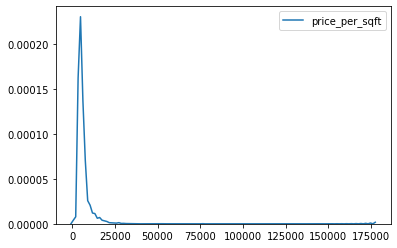

In [174]:
sns.kdeplot(data=data4.price_per_sqft)
plt.show()

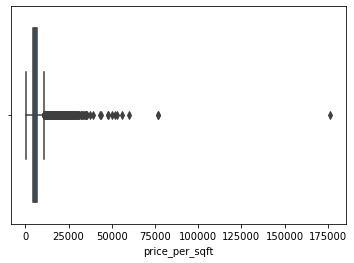

In [188]:
sns.boxplot('price_per_sqft',data=data4 )
plt.show()

In [190]:
data4.shape

(12502, 8)

In [199]:
def remove_outliers_pps(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        std=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft < (m+std))]
    
        df_out=pd.concat([df_out,reduced_df], ignore_index=True)
    print(df_out)  
    return df_out

data5=remove_outliers_pps(data4)
data5.shape


                  location       size  total_sqft  bath  balcony   price  bed  \
0      1st Block Jayanagar      4 BHK      2850.0   4.0      1.0  428.00    4   
1      1st Block Jayanagar      3 BHK      1630.0   3.0      2.0  194.00    3   
2      1st Block Jayanagar      3 BHK      1875.0   2.0      3.0  235.00    3   
3      1st Block Jayanagar      3 BHK      1200.0   2.0      0.0  130.00    3   
4      1st Block Jayanagar      2 BHK      1235.0   2.0      2.0  148.00    2   
...                    ...        ...         ...   ...      ...     ...  ...   
10236               others      2 BHK      1353.0   2.0      2.0  110.00    2   
10237               others  1 Bedroom       812.0   1.0      0.0   26.00    1   
10238               others      3 BHK      1440.0   2.0      2.0   63.93    3   
10239               others      2 BHK      1075.0   2.0      2.0   48.00    2   
10240               others      4 BHK      3600.0   5.0      0.0  400.00    4   

       price_per_sqft  
0  

(10241, 8)

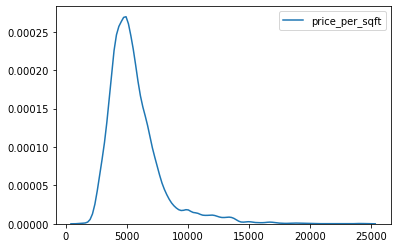

In [195]:
sns.kdeplot(data=data5.price_per_sqft)
plt.show()

We can see the dataset is pretty much cleaner and outliers are removed above 25000.


Now, while exploring our data, we found that in some data, the price per sqft for 2 bedrooms are higher than one with 3 bedrooms so lets evaluate it first in scatterplot.

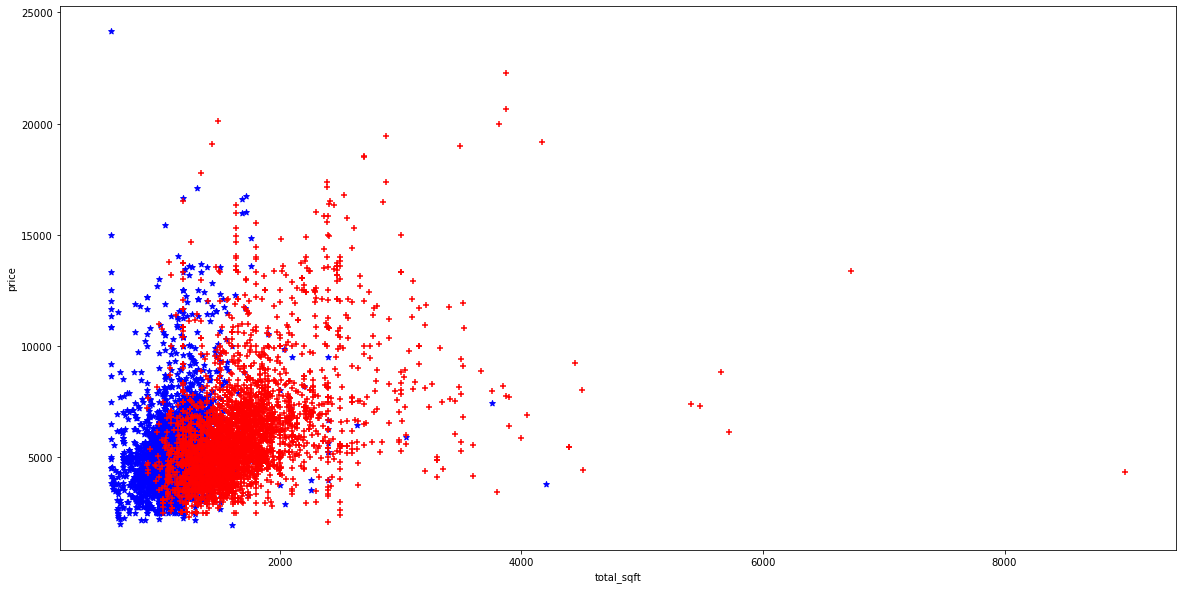

In [211]:
plt.figure(figsize=(20,10))
plt.scatter(data5[data5['bed']==2].total_sqft,data5[data5['bed']==2].price_per_sqft,color='blue',marker="*")
plt.scatter(data5[data5['bed']==3].total_sqft,data5[data5['bed']==3].price_per_sqft,color='red',marker="+")
plt.xlabel("total_sqft")
plt.ylabel("price")
plt.show()

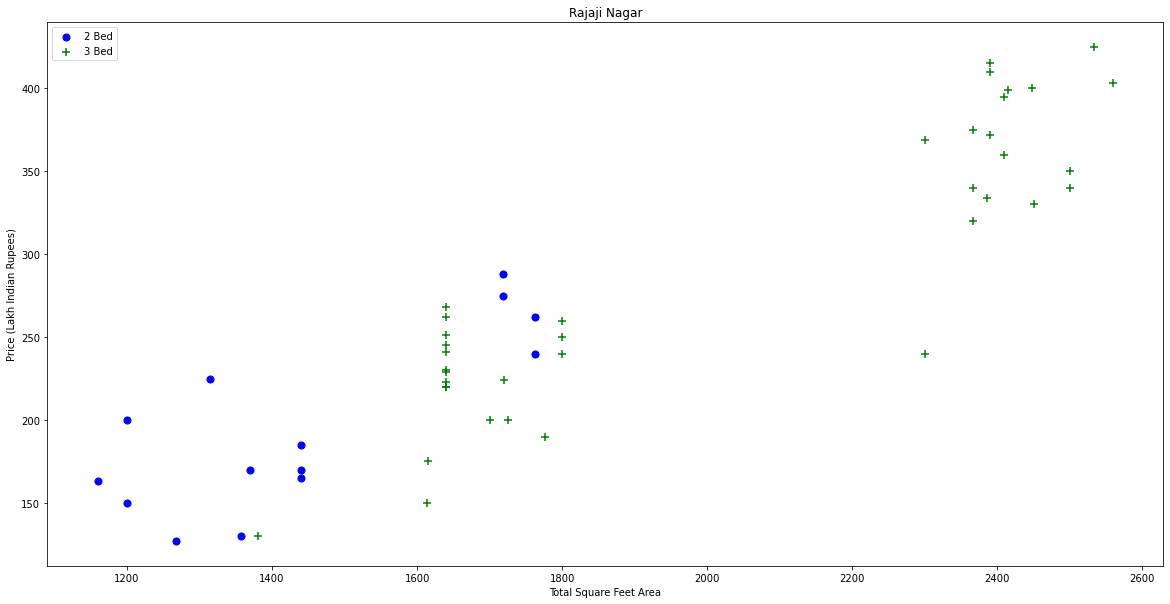

In [215]:
def plot_scatter_chart(df,location):
    bed2 = df[(df.location==location) & (df.bed==2)]
    bed3 = df[(df.location==location) & (df.bed==3)]
    plt.figure(figsize=(20,10))
    plt.scatter(bed2.total_sqft,bed2.price,color='blue',label='2 Bed', s=50)
    plt.scatter(bed3.total_sqft,bed3.price,marker='+', color='green',label='3 Bed', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data5,"Rajaji Nagar")

Here, we can see in some cases, 2 bedroom price and 3 bedroom price are equal ans also 2 bedroom price are higher than 3 bedroom price so we remove those 2 bedroom appartments whose price_per_sqft is more than mean price_per_sqft of 3 bedroom apartment.

In [231]:
def remove_bed_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bed_stats = {}
        #print(location_df)
        for bed, bed_df in location_df.groupby('bed'):
            #print(bed_df)
            bed_stats[bed] = {
                'mean': np.mean(bed_df.price_per_sqft),
                'std': np.std(bed_df.price_per_sqft),
                'count': bed_df.shape[0]
            }
        #print(bed_stats[bed])
        for bed, bed_df in location_df.groupby('bed'):
            stats = bed_stats.get(bed-1)
            #print(bed_df)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bed_df[bed_df.price_per_sqft<(stats['mean'])].index.values)
              
         
    return df.drop(exclude_indices,axis='index')

data6 = remove_bed_outliers(data5)
# df6 = data5.copy()
data6.shape

(7329, 8)

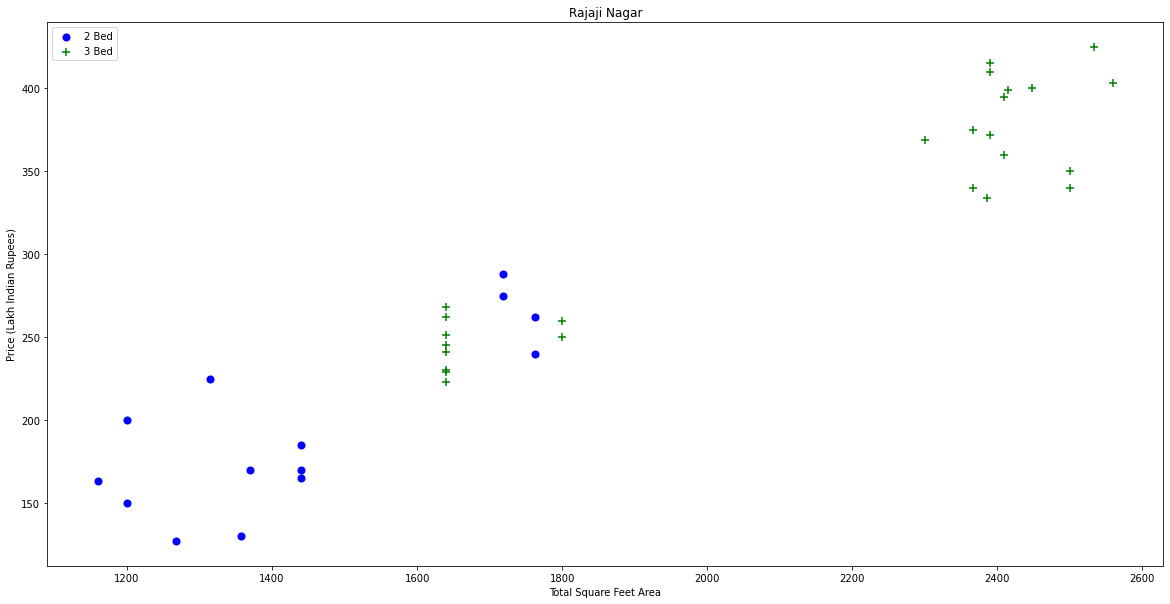

In [233]:
plot_scatter_chart(data6,"Rajaji Nagar")

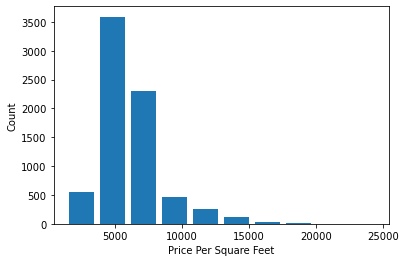

In [241]:
plt.hist(data6.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()

# Outlier Removal in Bathroom Feature

In [239]:
data6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

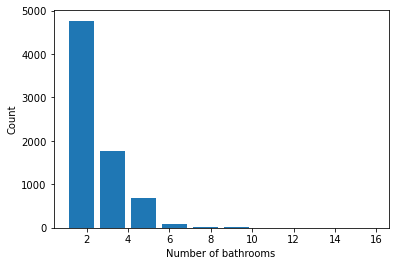

In [242]:
plt.hist(data6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [250]:
data6.shape

(7329, 8)

In [243]:
data6[data6['bath']>10]

,location,size,total_sqft,bath,balcony,price,bed,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,0.0,160.0,10,4000.000000
8486,others,10 BHK,12000.0,12.0,0.0,525.0,10,4375.000000
8575,others,16 BHK,10000.0,16.0,0.0,550.0,16,5500.000000
9308,others,11 BHK,6000.0,12.0,0.0,150.0,11,2500.000000
9639,others,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [251]:
data6[data6['bath']>data6['bed']+2].count()

location          4
size              4
total_sqft        4
bath              4
balcony           4
price             4
bed               4
price_per_sqft    4
dtype: int64

In [249]:
data7=data6[data6['bath']<data6['bed']+2]
print(data7.shape)
print(data6.shape)

(7251, 8)
(7329, 8)


In [253]:
data7.head(2)

,location,size,total_sqft,bath,balcony,price,bed,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491


In [255]:
data8=data7.drop(["size",'price_per_sqft'], axis=1)

In [256]:
data8.shape

(7251, 6)

# Using One Hot Encoding in Location as it is a categorical feature using dummies

In [259]:
data9=data8.copy()
dummies=pd.get_dummies(data9['location'])
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
data9=pd.concat([data9,dummies.drop("others",axis=1)], axis=1)

In [267]:
data9.head()

,total_sqft,bath,balcony,price,bed,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [268]:
data9=data9.drop("location", axis=1)

In [269]:
data9.shape

(7251, 246)

# Building model

In [270]:
X=data9.drop('price',axis=1)

In [271]:
y=data9.price

In [272]:
X.shape

(7251, 245)

In [273]:
y.shape

(7251,)

In [274]:
from sklearn.model_selection import train_test_split

In [296]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [297]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(X_train,y_train)
lin.score(X_test,y_test)

0.845287044932182

Lets use KFold cross validation to measure the accuracy of our LinearRegression model

In [299]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y,cv=cv)

array([0.82422698, 0.77159854, 0.8512903 , 0.80898801, 0.83614922])

# Now, we will find best model using GridSearchCV

In [302]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.818451,{'normalize': False}
1,lasso,0.687524,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.701731,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Looking at the result, we can conclude that Linear Regression gives the best score. 

In [306]:
X.head()

,total_sqft,bath,balcony,bed,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [317]:
def pred(location,sqft,bath,balcony,bed):
    loc_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=balcony
    x[3]=bed
    if loc_index>=0:
        x[loc_index]=1
        
    return lin.predict([x])[0]
        
    

In [309]:
np.where(X.columns=='1st Block Jayanagar')[0][0]

4

In [318]:
pred('1st Block Jayanagar',1000,3,2,3)

193.8365725166853

In [319]:
pred('Indira Nagar',50000, 2, 2,1)

4076.9269152902616

In [323]:
pred('Indira Nagar',50000, 4, 2,2)

4083.940835920593

# Now, lets export the tested model to a pickle file

In [324]:
import pickle
with open('Banglore House price predict.pickle','wb') as f:
    pickle.dump(lin,f)

# Exporting these information to a file that will be used in our predict application.

In [326]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns_.json","w") as f:
    f.write(json.dumps(columns))